In [160]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [221]:
# because the givin functions are of second order and newton is a second order approximation, while gradient descent is a first order expression
# newton method converges much faster. in some cases with alpha value high it takes exactly one iteration to reach the minimum point.
# also as the alpha decreses we might need more iterations but still newton is faster than GD

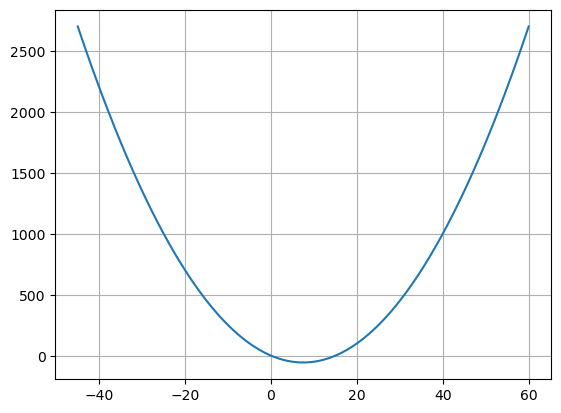

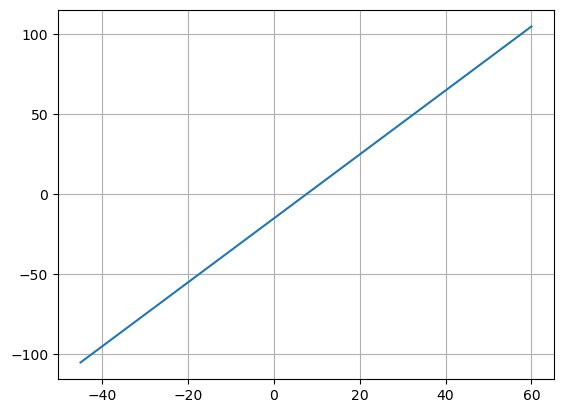

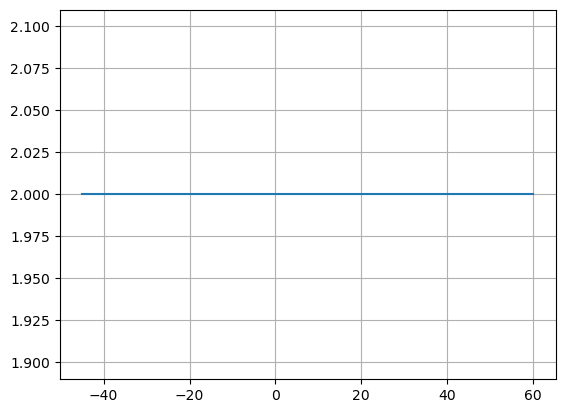

In [161]:
f = lambda x: x**2-15*x+1
df = lambda x:2*x-15
d2f = lambda x: 2*x/x
x= np.linspace(-45,60,300)

plt.figure()
plt.grid()
plt.plot(x,f(x))

plt.figure()
plt.grid()
plt.plot(x,df(x))

plt.figure()
plt.grid()
plt.plot(x,d2f(x))

In [166]:
def newtonMethod(x0,dfunc,d2func, alpha =1,epsilon = 0.001,max_iter=500):
    x = x0 
    curr_iter = 0
    x_list= []
    gradient_list=[]
    while(curr_iter <= max_iter):
        x_list.append(x)
        gradient_list.append(dfunc(x))
        if dfunc(x) < epsilon:
            break

        x =x - alpha*dfunc(x)/d2func(x)
        curr_iter+=1
    print("Newton Results with x0 =",x0, "epsilon=",epsilon)
    print("Found solution after ",curr_iter," iterations.")
    print("x_min = " , x)
    print("Gradient = " ,gradient_list[-1])
    return x,gradient_list[-1] 
   



In [222]:
def GD(X0,dfunc,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    x = X0
    curr_iter=0
    while(curr_iter <= max_iter):
        
        gradient = dfunc(x)
        norm_gradiant_vector=np.linalg.norm(gradient)   
        if  norm_gradiant_vector < grad_norm_min:
            break
        x=x - alpha*gradient
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter," iteration")
    print("x_Opt : ",x,"")
    #print("theta_0_Opt : ",theta[-1][1],"")
    print("gradient: "+ str(gradient)+"\n")
        
    return x,gradient 

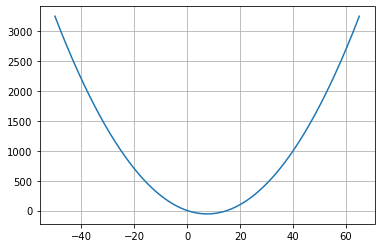

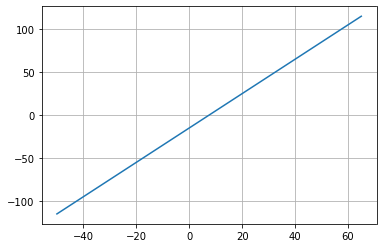

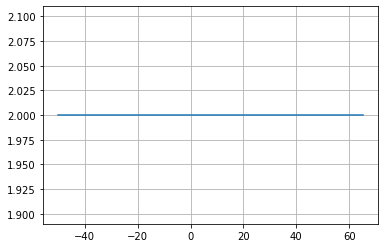

In [168]:
x_min,Gradient = newtonMethod(40,df,d2f,epsilon = 0.1,max_iter=600)

Newton Results with x0 = 40 epsilon= 0.1
Found solution after  1  iterations.
x_min =  7.5
Gradient =  0.0


Newton Results with x0 = 40 epsilon= 0.1
Found solution after , 1 , iterations.
x_min =  7.5
Gradient =  0.0


In [223]:
GD(40,df,alpha = 0.01,max_iter=1000,grad_norm_min=0.1)

****************** Training Report ********************
Gradient Descent converged after  321  iteration
x_Opt :  7.549596800192111 
gradient: 0.09919360038422198



(7.549596800192111, 0.09919360038422198)

In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [171]:
x_min,Gradient = newtonMethod(40,df,d2f,epsilon = 0.1,max_iter=600)

Newton Results with x0 = 40 epsilon= 0.1
Found solution after  1  iterations.
x_min =  7.5
Gradient =  0.0


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [172]:
x_min,Gradient = newtonMethod(40,df,d2f,alpha=0.8,epsilon = 0.1,max_iter=600)

Newton Results with x0 = 40 epsilon= 0.1
Found solution after  5  iterations.
x_min =  7.5104
Gradient =  0.020799999999999486


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [32]:
# first Function
f1 = lambda x: x[0]**2+x[1]**2
dxf1 = lambda x:2*x[0]
dyf1 = lambda x:2*x[1]
dx2f1 = lambda x: 2*x[0]/x[0]
dy2f1 = lambda x: 2*x[1]/x[1]
dxdyf1= lambda x: 0*x[0]/x[0]
dydxf1= lambda x: 0*x[0]/x[0]
hesian_f1 = np.array([[ dx2f1 , dxdyf1 ],[dydxf1 , dy2f1]])
df1_mat = np.array([[dxf1],[dyf1]])




#second function
f2 = lambda x: x[0]**2+x[0]*x[1]+x[1]**2
dxf2 = lambda x:2*x[0]+x[1]
dx2f2 = lambda x: 2*x[0]/x[0]
dyf2 = lambda x:x[0]+2*x[1]
dy2f2 = lambda x: 2*x[1]/x[1] 
dxdyf2= lambda x: 1*x[0]/x[0]
dydxf2= lambda x: 1*x[0]/x[0]
hesian_f2 = np.array([[ dx2f2 , dxdyf2 ],[dydxf2 , dy2f2]])
df2_mat = np.array([[dxf2],[dyf2]])

#third function
f3 = lambda x: (x[0]**2)*x[1]
dxf3 = lambda x:2*x[0]*x[1]
dx2f3 = lambda x: 2*x[1]
dyf3 = lambda x:x[0]**2
dy2f3 = lambda x: 0*x[1]/x[1] 
dxdyf3= lambda x: 2*x[0]
dydxf3= lambda x: 2*x[0]
hesian_f3 = np.array([[ dx2f3 , dxdyf3 ],[dydxf3 , dy2f3]])
df3_mat = np.array([[dxf3],[dyf3]])


In [58]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

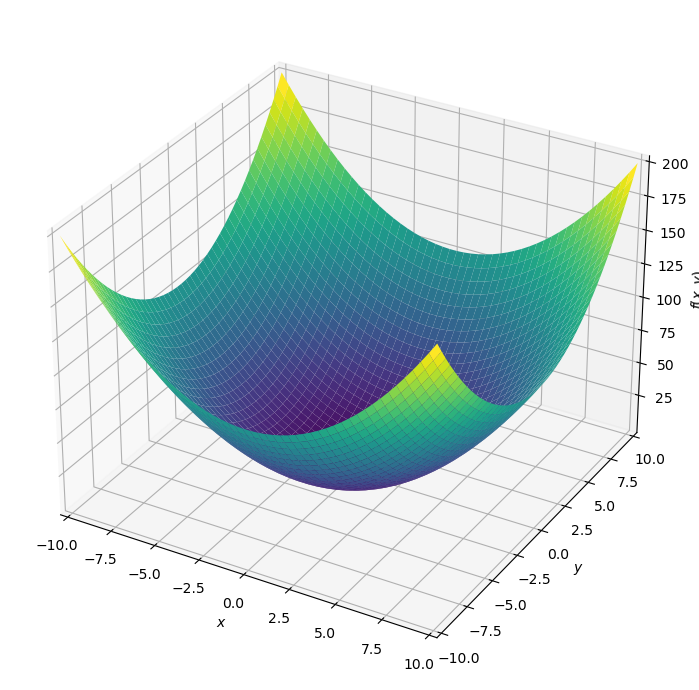

In [59]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

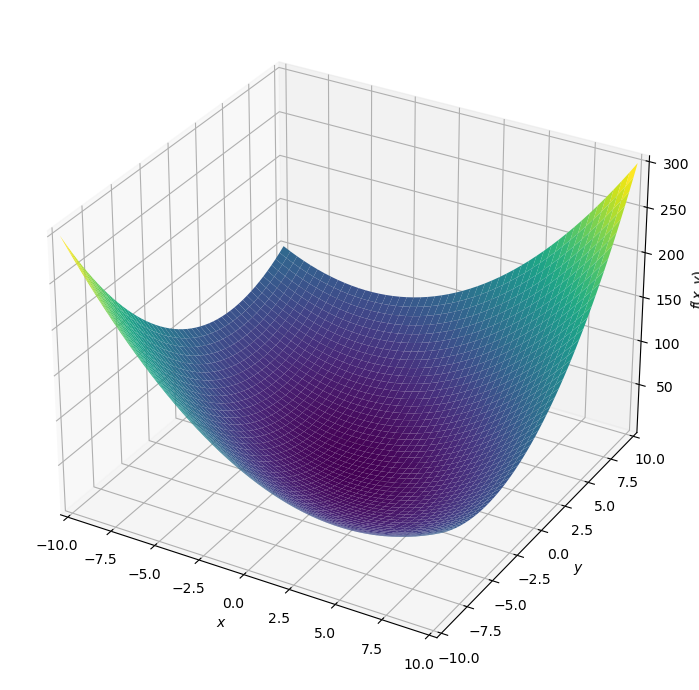

In [60]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

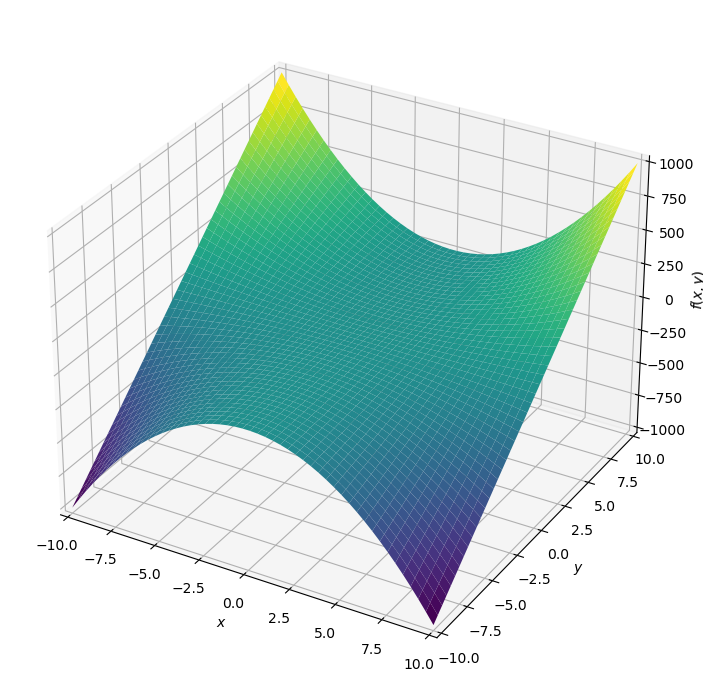

In [61]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [227]:
np.set_printoptions(precision=20)

def multiGD(X0,dfunc_mat,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
     
    x = np.array(X0).reshape(-1,1)
    
    
    curr_iter=0
    # norm_gradiant_vector= 10000000
    # j_mat=[]
    # gradient_list=[]
    while(curr_iter <= max_iter):
        #curr_theta = theta[:,-1].reshape(-1,1)
        # x_list.append(x)
        #h_x = np.dot(X,theta_n)
        #print(h_x.shape)
        #Error_Vector =h_x - y
        #print(Error_Vector.shape)
        # j = func(x)
        # j_mat.append(j)

       
        gradient = np.vectorize(lambda func: func(x))(dfunc_mat)
        
        #print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(gradient)   
        if  norm_gradiant_vector < grad_norm_min:
            
            break
        #print(alpha*gradient)
        x=x - alpha*gradient
        
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter," iterations")
    print("x_Opt : ",x,"")
    #print("theta_0_Opt : ",theta[-1][1],"")
    print("gradient: "+ str(gradient)+"\n")
    
    

    #np.array(x).reshape((len(x),len(x[0]))).transpose()
        
    return x,gradient 


In [264]:
def multiNewtonMethod(x0,dfunc_mat, hesian_func , alpha =1,epsilon = 0.001,max_iter=500):
    x = np.array(x0).reshape(-1,1) 
    curr_iter = 0
    x_list= []
    
    gradient_list=[]
    
    while(curr_iter <= max_iter):
        x_list.append(x)

        gradient = np.vectorize(lambda func: func(x))(dfunc_mat)
        print("gradient",gradient)
        print("gradient Shap",gradient.shape)

        gradient_list.append(gradient)
        norm_gradiant_vector=np.linalg.norm(gradient)   
        if  norm_gradiant_vector < epsilon:
            break

        hesian_mat = np.vectorize(lambda func: func(x))(hesian_func)
        print("hesian_mat",hesian_mat)
        print("hesian_mat shap",hesian_mat.shape)
        
        #print(hesian_mat)           
        x =x - alpha*(np.linalg.inv(hesian_mat))@gradient
        curr_iter+=1
    print("Newton Results with x0 =",x0, "epsilon=",epsilon)
    print("Found solution after ",curr_iter," iterations.")
    print("x_min = " , x)
    print("Gradient = " ,gradient_list[-1])
    return x,gradient_list[-1] 

In [265]:

x_min,Gradient=multiNewtonMethod((10.,10.),df1_mat, hesian_f1 , alpha =1,epsilon = 0.1,max_iter=500)

gradient [[20.]
 [20.]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.]
 [0.]]
gradient Shap (2, 1)
Newton Results with x0 = (10.0, 10.0) epsilon= 0.1
Found solution after  1  iterations.
x_min =  [[0.]
 [0.]]
Gradient =  [[0.]
 [0.]]


Newton Results with x0 = [10 10] epsilon= 0.1
Found solution after  1  iterations.
x_min =  [0. 0.]
Gradient =  0.0


In [266]:
x_min,Gradient = multiGD((10.0,10.0),dfunc_mat=np.array([[dxf1],[dyf1]]),alpha=0.1,grad_norm_min = 0.001,max_iter=600)

****************** Training Report ********************
Gradient Descent converged after  46  iterations
x_Opt :  [[0.0003484491437270411]
 [0.0003484491437270411]] 
gradient: [[0.0006968982874540822]
 [0.0006968982874540822]]



In [59]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]


In [214]:
x_min,Gradient = multiGD((10.0,10.0),dfunc_mat=np.array([[dxf1],[dyf1]]),alpha=0.5,grad_norm_min = 0.001,max_iter=600)

****************** Training Report ********************
Gradient Descent converged after  1  iterations
x_Opt :  [[0.]
 [0.]] 
gradient: [[0.]
 [0.]]



In [60]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [267]:
x_min,Gradient=multiNewtonMethod((10.,10.),df1_mat, hesian_f1 , alpha =1,epsilon = 0.001,max_iter=500)

gradient [[20.]
 [20.]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.]
 [0.]]
gradient Shap (2, 1)
Newton Results with x0 = (10.0, 10.0) epsilon= 0.001
Found solution after  1  iterations.
x_min =  [[0.]
 [0.]]
Gradient =  [[0.]
 [0.]]


In [61]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [268]:
x_min,Gradient=multiNewtonMethod((10.,10.),df1_mat, hesian_f1 , alpha =0.5,epsilon = 0.001,max_iter=500)

gradient [[20.]
 [20.]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[10.]
 [10.]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[5.]
 [5.]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[2.5]
 [2.5]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[1.25]
 [1.25]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.625]
 [0.625]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.3125]
 [0.3125]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.15625]
 [0.15625]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.078125]
 [0.078125]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hesian_mat shap (2, 2)
gradient [[0.0390625]
 [0.0390625]]
gradient Shap (2, 1)
hesian_mat [[2. 0.]
 [0. 2.]]
hes

In [62]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


In [217]:
x_min,Gradient = multiGD((10.0,10.0),dfunc_mat=np.array([[dxf2],[dyf2]]),alpha=0.5,grad_norm_min = 0.001,max_iter=600)

****************** Training Report ********************
Gradient Descent converged after  16  iterations
x_Opt :  [[0.000152587890625]
 [0.000152587890625]] 
gradient: [[0.000457763671875]
 [0.000457763671875]]



In [63]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [269]:
x_min,Gradient=multiNewtonMethod((10.,10.),df2_mat, hesian_f2 , alpha =1,epsilon = 0.001,max_iter=500)

gradient [[30.]
 [30.]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[0.]
 [0.]]
gradient Shap (2, 1)
Newton Results with x0 = (10.0, 10.0) epsilon= 0.001
Found solution after  1  iterations.
x_min =  [[0.]
 [0.]]
Gradient =  [[0.]
 [0.]]


In [64]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [270]:
x_min,Gradient=multiNewtonMethod((10.,10.),df2_mat, hesian_f2 , alpha =0.9,epsilon = 0.001,max_iter=500)

gradient [[30.]
 [30.]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[3.]
 [3.]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[0.30000000000000027]
 [0.30000000000000027]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[0.030000000000000027]
 [0.030000000000000027]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[0.0030000000000000027]
 [0.0030000000000000027]]
gradient Shap (2, 1)
hesian_mat [[2. 1.]
 [1. 2.]]
hesian_mat shap (2, 2)
gradient [[0.00030000000000000046]
 [0.00030000000000000046]]
gradient Shap (2, 1)
Newton Results with x0 = (10.0, 10.0) epsilon= 0.001
Found solution after  5  iterations.
x_min =  [[0.00010000000000000015]
 [0.00010000000000000015]]
Gradient =  [[0.00030000000000000046]
 [0.00030000000000000046]]


In [65]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


In [219]:
x_min,Gradient = multiGD((10.0,10.0),dfunc_mat=np.array([[dxf3],[dyf3]]),alpha=0.01,grad_norm_min = 0.001,max_iter=600)

****************** Training Report ********************
Gradient Descent converged after  79  iterations
x_Opt :  [[6.8059842079830230e-05]
 [6.8506118908142435e+00]] 
gradient: [[9.325031268780492e-04]
 [4.632142103931429e-09]]



In [194]:
x_min,Gradient = multiGD((10.0,10.0),dfunc_mat=np.array([[dxf3],[dyf3]]),alpha=0.01,grad_norm_min = 0.001,max_iter=600)

****************** Training Report ********************
Gradient Descent converged after  79  iterations
x_Opt :  [[6.8059842079830230e-05]
 [6.8506118908142435e+00]] 
gradient: [[9.325031268780492e-04]
 [4.632142103931429e-09]]



In [67]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [271]:
x_min,Gradient=multiNewtonMethod((10.,10.),df3_mat, hesian_f3 , alpha =1,epsilon = 0.001,max_iter=500)

gradient [[200.]
 [100.]]
gradient Shap (2, 1)
hesian_mat [[20. 20.]
 [20.  0.]]
hesian_mat shap (2, 2)
gradient [[50.00000000000001]
 [25.00000000000001]]
gradient Shap (2, 1)
hesian_mat [[10.                10.000000000000002]
 [10.000000000000002  0.               ]]
hesian_mat shap (2, 2)
gradient [[12.500000000000002]
 [ 6.250000000000003]]
gradient Shap (2, 1)
hesian_mat [[5.                5.000000000000001]
 [5.000000000000001 0.               ]]
hesian_mat shap (2, 2)
gradient [[3.1250000000000004]
 [1.5625000000000007]]
gradient Shap (2, 1)
hesian_mat [[2.5                2.5000000000000004]
 [2.5000000000000004 0.                ]]
hesian_mat shap (2, 2)
gradient [[0.7812500000000001 ]
 [0.39062500000000017]]
gradient Shap (2, 1)
hesian_mat [[1.25               1.2500000000000002]
 [1.2500000000000002 0.                ]]
hesian_mat shap (2, 2)
gradient [[0.19531250000000003]
 [0.09765625000000004]]
gradient Shap (2, 1)
hesian_mat [[0.625              0.6250000000000001]
 [0

In [68]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

# as we have the hesian matrix in multi variable newton method the code becomes heavy computationaly and timewise. BFGS introduced an effective way in computing the inv of H matrix by calculating the Binv matrix. BFGS might need more iterations with same parameters to reach the minimum points but it is computationaly faster and less complex.

In [247]:
def BFSG(xk_p,xk, dfunc_mat,hesian_func , alpha =1,epsilon = 0.001,max_iter=500):
    
    curr_iter = 0
    
    gradient_list = []
    
    x_list=[]
    x = np.array(xk_p).reshape(-1,1)


    #print(dfunc_mat.shape)
    #print(x.shape)
    gradient = np.vectorize(lambda func: func(x))(dfunc_mat)
   

    
    #print("1",gradient)
    gradient_list.append(gradient.copy())

    x_list.append(x)

    x=np.array(xk).reshape(-1,1)
    
    #B_mat = np.vectorize(lambda func: func(x))(hesian_func)
    
    I=np.identity(x.shape[0])
    #B_inv_mat= np.linalg.inv(B_mat)
    B_inv_mat=np.linalg.inv(I)
    print("B_inv_mat = ",B_inv_mat)

    while(curr_iter <= max_iter):

        print("***************iteration ",curr_iter +1 , "***************************")
        x_list.append(x)
        
     #   print(x.shape)
        gradient = np.vectorize(lambda func: func(x))(dfunc_mat)

      #  print("2",gradient_list)
        gradient_list.append(gradient.copy())        

        
        norm_gradiant_vector=np.linalg.norm(gradient_list[-1])
        print("x-2",x_list[-2])
        print("x-1",x_list[-1])
        print("norm_gradiant_vector = ",norm_gradiant_vector) 
        print("g_n-1 = ", gradient_list[-2])
        print("g_n = ", gradient_list[-1])
        
        if  norm_gradiant_vector < epsilon:
            break
        
        #print("norm_grad",norm_gradiant_vector)    
       # print("Gradient",np.array(gradient_list) )   
       # print(gradient_list[-1])
       # print(gradient_list[-2]) 
         
        
        y =np.array(gradient_list[-1]-gradient_list[-2])
       # print("y",y)
        
           
        deltaX = x_list[-1]-x_list[-2]
        print("dltaX",deltaX)
        #I = np.identity(B_mat.shape[0])
        #print(deltaX.shape)
        print("y",y)
        b1 =I - (deltaX@y.transpose())/(y.transpose()@deltaX)
        b2= B_inv_mat
        b3=I -(y@deltaX.transpose())/(y.transpose()@deltaX)
        b4= (deltaX@deltaX.transpose())/(y.transpose()@deltaX)
        B_inv_mat= b1@b2@b3+b4
        print("B_inv",B_inv_mat)
        x= x-alpha*B_inv_mat@gradient
        #print(b1)
        #print(b2)
        #print(b3)
        #print(b4)
        #print(x)
        curr_iter+=1
    print("****************************************************")    
    print( "Found solution after ",curr_iter+1 ,"iterations")    
    print("xy_min =", x)
    print("Gradient =",gradient_list[-1])
        
    return x,gradient          



In [259]:
x_min,grad=BFSG((10.,10.),(9.,9.), df1_mat,hesian_f1 , alpha =1,epsilon = 0.001,max_iter=500)
x_min,grad

(2, 1)
(2, 1)
B_inv_mat =  [[1. 0.]
 [0. 1.]]
***************iteration  1 ***************************
x-2 [[10.]
 [10.]]
x-1 [[9.]
 [9.]]
norm_gradiant_vector =  25.45584412271571
g_n-1 =  [[20.]
 [20.]]
g_n =  [[18.]
 [18.]]
dltaX [[-1.]
 [-1.]]
y [[-2.]
 [-2.]]
B_inv [[ 0.75 -0.25]
 [-0.25  0.75]]
***************iteration  2 ***************************
x-2 [[9.]
 [9.]]
x-1 [[0.]
 [0.]]
norm_gradiant_vector =  0.0
g_n-1 =  [[18.]
 [18.]]
g_n =  [[0.]
 [0.]]
****************************************************
Found solution after  2 iterations
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


(array([[0.],
        [0.]]),
 array([[0.],
        [0.]]))

In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [260]:
x_min,grad=BFSG((10.,10.),(9.,9.), df1_mat,hesian_f1 , alpha =0.9,epsilon = 0.001,max_iter=500)
x_min,grad

(2, 1)
(2, 1)
B_inv_mat =  [[1. 0.]
 [0. 1.]]
***************iteration  1 ***************************
x-2 [[10.]
 [10.]]
x-1 [[9.]
 [9.]]
norm_gradiant_vector =  25.45584412271571
g_n-1 =  [[20.]
 [20.]]
g_n =  [[18.]
 [18.]]
dltaX [[-1.]
 [-1.]]
y [[-2.]
 [-2.]]
B_inv [[ 0.75 -0.25]
 [-0.25  0.75]]
***************iteration  2 ***************************
x-2 [[9.]
 [9.]]
x-1 [[0.8999999999999986]
 [0.8999999999999986]]
norm_gradiant_vector =  2.545584412271567
g_n-1 =  [[18.]
 [18.]]
g_n =  [[1.7999999999999972]
 [1.7999999999999972]]
dltaX [[-8.100000000000001]
 [-8.100000000000001]]
y [[-16.200000000000003]
 [-16.200000000000003]]
B_inv [[ 0.75 -0.25]
 [-0.25  0.75]]
***************iteration  3 ***************************
x-2 [[0.8999999999999986]
 [0.8999999999999986]]
x-1 [[0.08999999999999986]
 [0.08999999999999986]]
norm_gradiant_vector =  0.2545584412271567
g_n-1 =  [[1.7999999999999972]
 [1.7999999999999972]]
g_n =  [[0.17999999999999972]
 [0.17999999999999972]]
dltaX [[-0.8099

(array([[8.99999999999998e-05],
        [8.99999999999998e-05]]),
 array([[0.0001799999999999996],
        [0.0001799999999999996]]))

In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [261]:
x_min,grad=BFSG((10.,10.),(9.,9.), df2_mat,hesian_f2 , alpha =1,epsilon = 0.001,max_iter=500)
x_min,grad

(2, 1)
(2, 1)
B_inv_mat =  [[1. 0.]
 [0. 1.]]
***************iteration  1 ***************************
x-2 [[10.]
 [10.]]
x-1 [[9.]
 [9.]]
norm_gradiant_vector =  38.18376618407357
g_n-1 =  [[30.]
 [30.]]
g_n =  [[27.]
 [27.]]
dltaX [[-1.]
 [-1.]]
y [[-3.]
 [-3.]]
B_inv [[ 0.6666666666666666  -0.33333333333333337]
 [-0.33333333333333337  0.6666666666666666 ]]
***************iteration  2 ***************************
x-2 [[9.]
 [9.]]
x-1 [[1.7763568394002505e-15]
 [1.7763568394002505e-15]]
norm_gradiant_vector =  7.53644380168212e-15
g_n-1 =  [[27.]
 [27.]]
g_n =  [[5.329070518200751e-15]
 [5.329070518200751e-15]]
****************************************************
Found solution after  2 iterations
xy_min = [[1.7763568394002505e-15]
 [1.7763568394002505e-15]]
Gradient = [[5.329070518200751e-15]
 [5.329070518200751e-15]]


(array([[1.7763568394002505e-15],
        [1.7763568394002505e-15]]),
 array([[5.329070518200751e-15],
        [5.329070518200751e-15]]))

In [74]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [262]:
x_min,grad=BFSG((10.,10.),(9.,9.), df2_mat,hesian_f2 , alpha =0.9,epsilon = 0.001,max_iter=500)
x_min,grad

(2, 1)
(2, 1)
B_inv_mat =  [[1. 0.]
 [0. 1.]]
***************iteration  1 ***************************
x-2 [[10.]
 [10.]]
x-1 [[9.]
 [9.]]
norm_gradiant_vector =  38.18376618407357
g_n-1 =  [[30.]
 [30.]]
g_n =  [[27.]
 [27.]]
dltaX [[-1.]
 [-1.]]
y [[-3.]
 [-3.]]
B_inv [[ 0.6666666666666666  -0.33333333333333337]
 [-0.33333333333333337  0.6666666666666666 ]]
***************iteration  2 ***************************
x-2 [[9.]
 [9.]]
x-1 [[0.9000000000000021]
 [0.9000000000000021]]
norm_gradiant_vector =  3.8183766184073655
g_n-1 =  [[27.]
 [27.]]
g_n =  [[2.7000000000000064]
 [2.7000000000000064]]
dltaX [[-8.099999999999998]
 [-8.099999999999998]]
y [[-24.299999999999994]
 [-24.299999999999994]]
B_inv [[ 0.6666666666666667 -0.3333333333333333]
 [-0.3333333333333333  0.6666666666666667]]
***************iteration  3 ***************************
x-2 [[0.9000000000000021]
 [0.9000000000000021]]
x-1 [[0.08999999999999997]
 [0.08999999999999997]]
norm_gradiant_vector =  0.38183766184073553
g_n-1

(array([[9.000000000000045e-05],
        [9.000000000000045e-05]]),
 array([[0.00027000000000000136],
        [0.00027000000000000136]]))

In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [263]:
x_min,grad=BFSG((10.,10.),(9.,9.), df3_mat,hesian_f3 , alpha =1,epsilon = 0.001,max_iter=500)
x_min,grad

(2, 1)
(2, 1)
B_inv_mat =  [[1. 0.]
 [0. 1.]]
***************iteration  1 ***************************
x-2 [[10.]
 [10.]]
x-1 [[9.]
 [9.]]
norm_gradiant_vector =  181.12150617748296
g_n-1 =  [[200.]
 [100.]]
g_n =  [[162.]
 [ 81.]]
dltaX [[-1.]
 [-1.]]
y [[-38.]
 [-19.]]
B_inv [[ 0.23976608187134504 -0.42690058479532167]
 [-0.42690058479532167  0.9064327485380117 ]]
***************iteration  2 ***************************
x-2 [[9.]
 [9.]]
x-1 [[4.7368421052631575]
 [4.736842105263165 ]]
norm_gradiant_vector =  50.172162376034116
g_n-1 =  [[162.]
 [ 81.]]
g_n =  [[44.87534626038787 ]
 [22.437673130193904]]
dltaX [[-4.2631578947368425]
 [-4.263157894736835 ]]
y [[-117.12465373961213]
 [ -58.5623268698061 ]]
B_inv [[ 0.24648786717752258 -0.4201787994891445 ]
 [-0.42017879948914455  0.9131545338441887 ]]
***************iteration  3 ***************************
x-2 [[4.7368421052631575]
 [4.736842105263165 ]]
x-1 [[3.1034482758620463]
 [3.103448275862121 ]]
norm_gradiant_vector =  21.536445443

(array([[0.015340037362893787],
        [0.015340037767820803]]),
 array([[0.00047063350501314586],
        [0.00023531674629497738]]))

In [76]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332